In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel("Book1.xlsx")

In [3]:
df.head()

,Amount_of_Algae,Initial_Concentration,Absorbance,PPM,Contact_time,PH,Removal Effeciency,Removal Effeciency.1
0,0.5,1000,0.48,865.459118,30,4,0.134541,13.454088
1,1.0,1000,0.42,739.450043,30,4,0.260550,26.054996
2,2.0,1000,0.40,697.447018,30,4,0.302553,30.255298
3,3.0,1000,0.37,634.442480,30,4,0.365558,36.555752
4,4.0,1000,0.32,529.434918,30,4,0.470565,47.056508


In [5]:
#mporting necessary libraries
# Splitting and scaling the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Creating ANN model
import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense

# Evaluating the model
from sklearn.metrics import r2_score

In [8]:
df = df.drop(['Removal Effeciency.1'],axis='columns')
df.head()

,Amount_of_Algae,Initial_Concentration,Absorbance,PPM,Contact_time,PH,Removal Effeciency
0,0.5,1000,0.48,865.459118,30,4,0.134541
1,1.0,1000,0.42,739.450043,30,4,0.260550
2,2.0,1000,0.40,697.447018,30,4,0.302553
3,3.0,1000,0.37,634.442480,30,4,0.365558
4,4.0,1000,0.32,529.434918,30,4,0.470565


# Splitting the dataset into training and testing data

In [9]:
X = df.drop('Removal Effeciency',axis='columns')
y = df['Removal Effeciency']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print('Lenght of training data:',len(X_train))
print('Lenght of testing data:',len(X_test))

Lenght of training data: 84
Lenght of testing data: 36


# Feature Scaling
We will be using MinMaxScaler from sklearn library.
This scales your data between 0 and 1.

In [10]:
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating ANN model

In [11]:
model = Sequential()

# input layer
model.add(Input(shape=(6,)))

# hidden layers
model.add(Dense(20,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(20,activation='relu'))

# output layer
model.add(Dense(1,activation='linear'))

model.compile(optimizer='adam',loss='mse')

# Training the model

In [12]:
model.fit(x=X_train,y=y_train.values,validation_data=(X_test,y_test.values),batch_size=256,epochs=400)

Epoch 1/400
1/1 [==============================] - 4s 4s/step - loss: 0.2635 - val_loss: 0.2227
Epoch 2/400
1/1 [==============================] - 0s 58ms/step - loss: 0.2487 - val_loss: 0.2066
Epoch 3/400
1/1 [==============================] - 0s 32ms/step - loss: 0.2315 - val_loss: 0.1896
Epoch 4/400
1/1 [==============================] - 0s 24ms/step - loss: 0.2133 - val_loss: 0.1729
Epoch 5/400
1/1 [==============================] - 0s 32ms/step - loss: 0.1947 - val_loss: 0.1561
Epoch 6/400
1/1 [==============================] - 0s 32ms/step - loss: 0.1759 - val_loss: 0.1391
Epoch 7/400
1/1 [==============================] - 0s 23ms/step - loss: 0.1569 - val_loss: 0.1223
Epoch 8/400
1/1 [==============================] - 0s 33ms/step - loss: 0.1381 - val_loss: 0.1059
Epoch 9/400
1/1 [==============================] - 0s 32ms/step - loss: 0.1196 - val_loss: 0.0902
Epoch 10/400
1/1 [==============================] - 0s 41ms/step - loss: 0.1018 - val_loss: 0.0760
Epoch 11/400
1/1 [===

# Evaluating the model

In [13]:
y_predicted = model.predict(X_test)

print('r2 score:',r2_score(y_test,y_predicted))

2/2 [==============================] - 0s 0s/step
r2 score: 0.9775327478365238


C:\Users\dell3\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


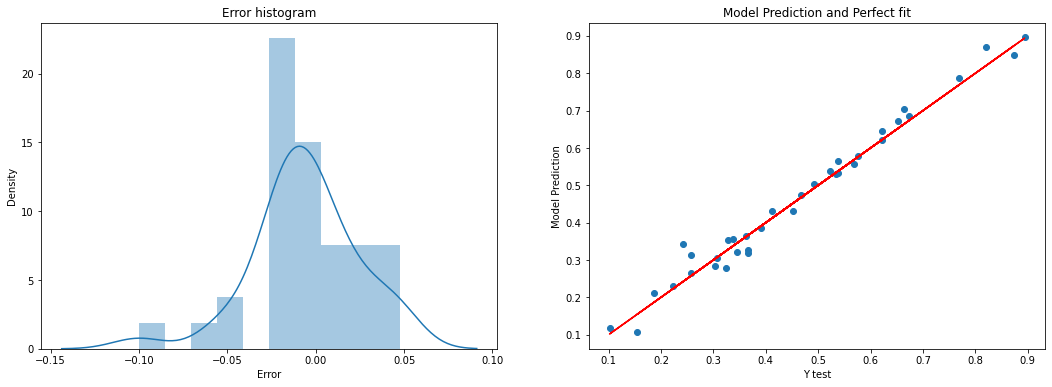

In [15]:
import seaborn as sns
fig,ax = plt.subplots(ncols=2,figsize=(18,6))

y_test_values = y_test.values
y_predicted_values = y_predicted.reshape(len(y_predicted))
errors = y_test_values - y_predicted_values

sns.distplot(errors,ax=ax[0])
ax[0].set_title('Error histogram')
ax[0].set_xlabel('Error')

ax[1].scatter(y_test_values,y_predicted_values)
ax[1].plot(y_test_values,y_test_values,'r')
ax[1].set_title('Model Prediction and Perfect fit')
ax[1].set_xlabel('Y test')
ax[1].set_ylabel('Model Prediction')
plt.show()

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                140       
                                                                 
 dense_1 (Dense)             (None, 30)                630       
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dense_3 (Dense)             (None, 20)                620       
                                                                 
 dense_4 (Dense)             (None, 20)                420       
                                                                 
 dense_5 (Dense)             (None, 30)                630       
                                                                 
 dense_6 (Dense)             (None, 30)                9

In [18]:
y_predicted = model.predict(X_test)

print('Loaded model r2 score:',r2_score(y_test,y_predicted))

2/2 [==============================] - 0s 0s/step
Loaded model r2 score: 0.9775327478365238
